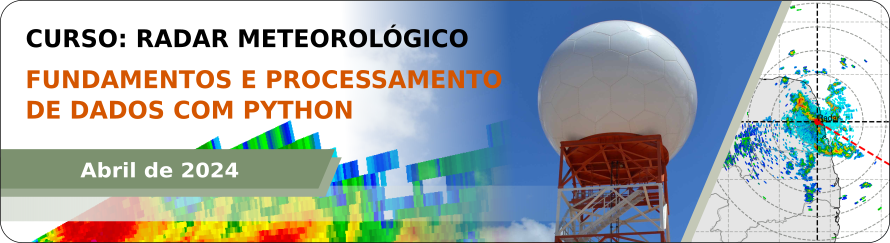

#`Tarefa 1 - 22/04/2024:` Conhecendo os dados dos radares do CEMADEN

- Este Colab cont√©m as tarefas referentes ao primeiro dia do curso - 22/04/2024.

- Todas as instru√ß√µes e scripts s√£o processados diretamente na nuvem, n√£o sendo necess√°rio instalar ferramentas ou fazer o download dos dados localmente no seu computador. Para rodar as c√©lulas de c√≥digo, click no √≠cone de `play` no lado esquerdo superior ou digite `ctrl enter` no seu teclado.

---

**OBJETIVO:** Aplicar os conceitos aprendidos na parte pr√°tica do curso sobre os dados fornecidos por um radar meteorol√≥gico e a estrat√©gia de varredura.


---


**DADOS:** Usaremos os dados volum√©tricos (ou seja, contendo todos os Plan Position Indicator-PPIs) da refletividade corrigida (dBZ) do radar de Jaraguari (MS) pertencente ao CEMADEN. No script existe um passo-a-passo explicando como baixar os dados volum√©tricos do radar no [site do CEMADEN](http://www2.cemaden.gov.br/mapainterativo/).

---

**PROCEDIMENTO REALIZADO NESTE SCRIPT:** Os seguintes procedimentos ser√£o realizados nesta tarefa:
1. 1¬∞ Passo: Instala√ß√£o das bibliotecas
2. 2¬∞ Passo: Importando as bibliotecas
3. 3¬∞ Passo: Baixar os dados do radar do CEMADEN
4. **EXERC√çCIO A)** - Conhecendo as informa√ß√µes contidas nos dados do radar de Jaraguari (MS)
5. **EXERC√çCIO B)** - Analisando a estrat√©gia de varredura do radar de Jaraguari (MS)
---

**PASSO-A-PASSO PARA REALIZA√á√ÉO DA ATIVIDADE**:

1.   Processar os Passos 1 e 2 do script.
2.   Baixar o arquivo volum√©trico da refletividade corrigida de um hor√°rio do radar de Jaraguari (MS) como indicado no Passo 3.
3.   Realizar o Exerc√≠cio A).
4.   Realizar o Exerc√≠cio B).

---

**Equipe:**

Palestrantes/Tutores:

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Thiago Souza Biscaro - INPE: thiago.biscaro@inpe.br / https://github.com/tsbiscaro

Colaboradores:
 - Diego Souza - INPE: diego.souza@inpe.br / https://github.com/diegormsouza
 - Fl√°vio Augusto - UNIFEI: augustoflaviobob@gmail.com
---

# **1¬∞ Passo:** Instalando bibliotecas

Neste passo instalaremos as bibliotecas necess√°rias para a execu√ß√£o dos scripts. Basicamente, as bibliotecas ter√£o a seguinte finalidade:

*   **cartopy:** Trabalhar com mapas geogr√°ficos
*   **pyart:** Leitura e exibi√ß√£o dos dados do radar
*   **wradlib:** Plotagem da estrat√©gia de varredura do radar


O c√≥digo abaixo instala o pacote condacolab e reinicia o ambiente automaticamente.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

‚è¨ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:18
üîÅ Restarting kernel...


Ap√≥s processar a c√©lula de c√≥digo anterior, aparecer√° a mensagem abaixo. Essa mensagem √© normal aparecer ao instalar o pacote condacolab, e n√£o afeta o prosseguimento das execu√ß√µes da c√©lula. Assim, basta fechar o aviso e seguir para pr√≥xima c√©lula do c√≥digo.

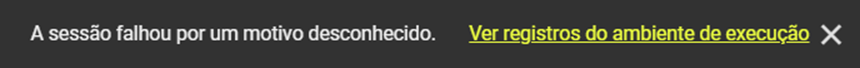

Instala√ß√£o dos pacotes necess√°rios.

In [1]:
!mamba install -q -c conda-forge cartopy==0.21.1 arm_pyart==1.16.0 wradlib

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


# **2¬∞ Passo:** Importando bibliotecas

Nesta etapa importaremos todas as bibliotecas necess√°rias para a nossa tarefa.

In [2]:
import pyart                      # Biblioteca para trabalhar com dados de radar
import wradlib as wrl             # Biblioteca para trabalhar com dados de radar
import matplotlib.pyplot as plt   # Biblioteca para gerar gr√°ficos
import cartopy.crs as ccrs        # Biblioteca para trabalhar com proje√ß√µes de mapas
from netCDF4 import num2date      # Biblioteca para trabalhar com datas
import numpy as np                # Biblioteca para trabalhar com matrizes

# ignora avisos
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



Se a sess√£o do Colab reiniciar automaticamente ap√≥s processar a c√©lula de importa√ß√£o das bibliotecas, basta rodar o Passo 2 novamente, e seguir processando as demais c√©lulas a seguir.

# **3¬∞ Passo:** Baixando os dados do radar do CEMADEN

Nesta etapa voc√™ dever√° baixar o dado volum√©trico de refletividade corrigida do radar de Jaraguari (MS) pertencente ao CEMADEN. Para isto, primeiramente voc√™ dever√° acessar o [site](http://www2.cemaden.gov.br/mapainterativo/#) do CEMADEN e acessar a aba `Download de Dados` e em seguida clicar em `Radares`, como indicado na imagem a seguir:



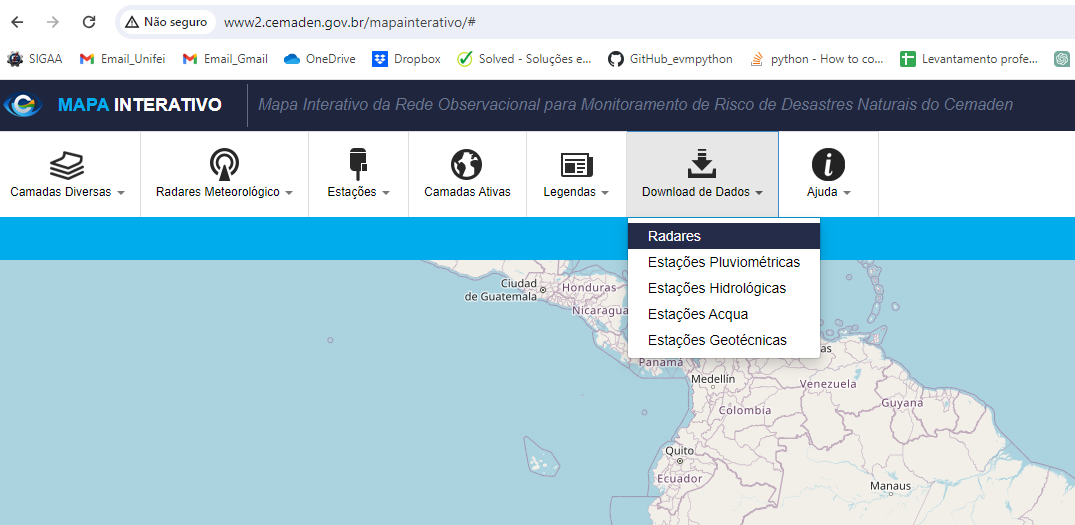

- Aparecer√° uma lista com os nomes dos nove radares do CEMADEN. Em seguida voc√™ dever√° acessar o link com o nome `2. jaraguari`, e clicar em `3. vol_250km_12steps.vol` e escolher o arquivo que cont√™m a refletividade corrigida, que esta com o final `dBZ.vol.h5`. No nosso exemplo abaixo, seria o arquivo `14. 2024021622300200dBZ.vol.h5`. Importante salientar que o CEMADEN atualmente dispon√≠biliza os dados de radar compreendendo o per√≠odo da data atual at√© um m√™s atr√°s.

- Importante lembrar que n√£o √© necess√°rio baixar especificamente o arquivo do radar com a data `2024021622300200dBZ.vol.h5`. Voc√™s poder√£o baixar o arquivo para qualquer data, por√©m o arquivo precisa conter a extens√£o `dBZ.vol.h5`.

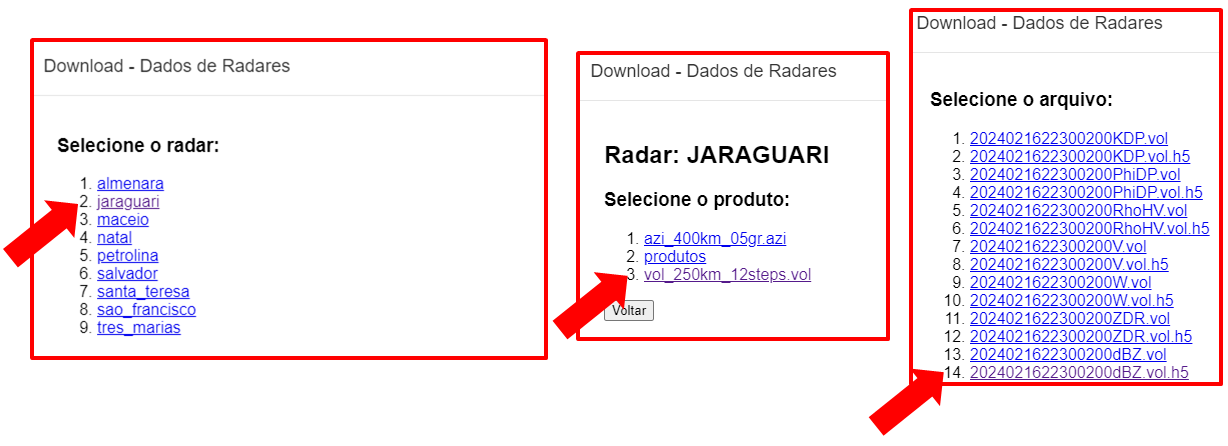

- Ao clicar no nome do arquivo, voc√™ dever√° prencher o CAPTCHA e ap√≥s esse procedimento o arquivo ser√° baixado para o seu computador pessoal, no diret√≥rio de downloads.

- Ap√≥s esse passo, voc√™ dever√° fazer o upload do arquivo para a sua ses√£o do Colab. Para isto voc√™ dever√° clicar na seta localizada na parte esquerda da sua tela do Colab, e em seguida escolher o arquivo que foi baixado na pasta downloads do seu computador, como indicado nas imagens a seguir:

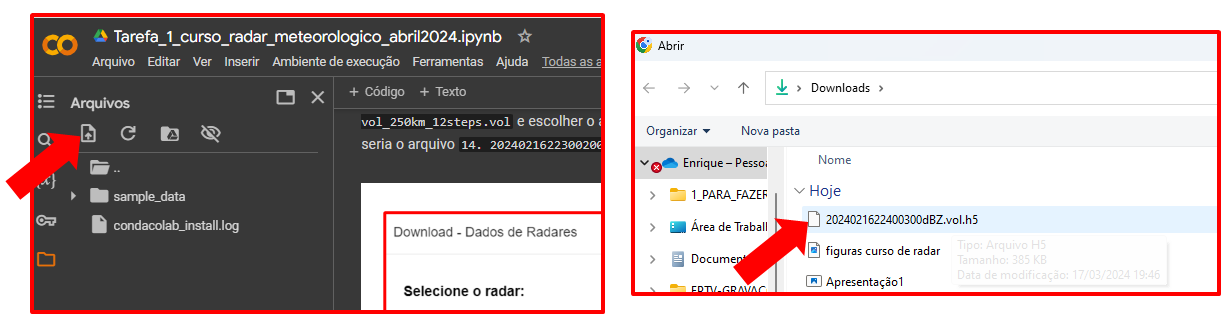

- Depois de fazer o upload do arquivo, veja que o arquivo ficar√° armazenado no `/content`, como indicado na imagem a seguir.

- Lembre-se que o  `/content` √© a mem√≥ria moment√¢nea da sua sess√£o do Colab. O que significa que assim que voc√™ fechar a sua sess√£o do Colab, o arquivo ir√° ser exclu√≠do dessa sess√£o automaticamente.   

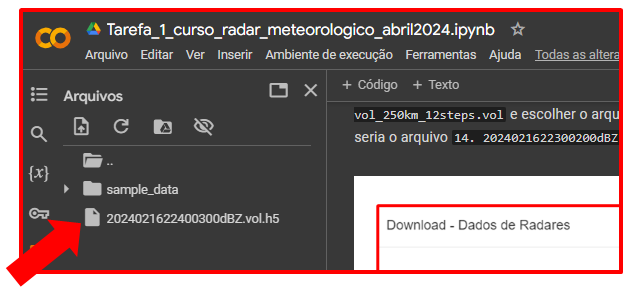

- Uma explica√ß√£o detalhada dos tipos dos dados dos radares do CEMADEN e o que significa a nomenclatura dos arquivos podem ser acessado nesse [tutorial](https://github.com/evmpython/curso_radar_UNIFEI_INPE_2024/blob/main/doc/Acesso_a_Dados_CEMADEN_v2024-03-19.pdf) que preparamos.

- Agora j√° estamos com o arquivo volum√©trico de refletividade corrigida do radar de Jaraguari (MS). Assim podemos come√ßar a realizar a nossa Tarefa 1.





---


# **EXERC√çCIO A):** Conhecendo as Informa√ß√µes Contidas no Dado do Radar de Jaraguari (MS)


---


**ENUNCIADO:** O objetivo deste exerc√≠cio √© voc√™s conhecerem as informa√ß√µes contidas no arquivo do radar de Jaraguari (MS). Para isto voc√™s utilizar√£o como refer√™ncia o `Script 01` da aula pr√°tica. Todas as informa√ß√µes importantes sobre a `Configura√ß√£o do Radar` e a `Estrat√©gia de Varredura` est√£o contidas dentro do arquivo do radar. Ent√£o para isto voc√™s precisam ler o dado do radar e exibir as informa√ß√µes solicitadas, que s√£o:

1.   Campos do objeto *radar*
2.   Latitude do radar
3.   Longitude do radar
4.   Altitude do radar
5.   Data e hor√°rio do arquivo
6.   Data/Hor√°rio do in√≠cio e fim do scan time do radar
7.   Quantidade de bins
8.   Resolu√ß√£o radial
9.  Quantidade total de azimutes
10.  Quantidade de azimutes por eleva√ß√£o
11.  Quantidade de eleva√ß√µes
12.  Valores dos √¢ngulos de eleva√ß√£o


`Leitura` do dado do radar:

In [6]:
# nome do arquivo
filename = '2024032316300300dBZ.vol.h5'

# leitura do dado
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

Investigando as informa√ß√µes do objeto "radar"

In [7]:
dir(radar)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'add_filter',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_area',
 'get_gate_lat_lon_alt',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gat

Utilizando as atribui√ß√µes existentes dentro do objeto radar mostrado acima, mostre as informa√ß√µes solicitadas a seguir:

Exibindo os `campos do objeto radar`:

In [10]:
radar.fields.keys()

dict_keys(['reflectivity_horizontal'])

dict_keys(['reflectivity'])


Mostre o valor da `latitude` do radar:

In [12]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-20.27855])}

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-20.27855])}

Mostre o valor da `longitude` do radar:

In [13]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-54.47396])}

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-54.47396])}

Mostre o valor da `altitude` do radar:

In [14]:
radar.altitude

{'long_name': 'Altitude',
 'standard_name': 'Altitude',
 'units': 'meters',
 'positive': 'up',
 'data': array([753.])}

{'long_name': 'Altitude',
 'standard_name': 'Altitude',
 'units': 'meters',
 'positive': 'up',
 'data': array([753.])}

Mostre a `data e hor√°rio do arquivo do radar`:

In [15]:
radar.time

{'units': 'seconds since 2024-03-23T16:30:03Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.,   0.,   0., ..., 300., 300., 301.], dtype=float32)}

{'units': 'seconds since 2024-02-16T22:40:03Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.,   0.,   0., ..., 301., 301., 302.], dtype=float32)}

Mostre a `data/hor√°rio do in√≠cio e fim` do scan do radar:

In [16]:
print('In√≠cio do volscan=', num2date(radar.time['data'][0], radar.time['units'] ))
print('Fim do volscan=', num2date(radar.time['data'][-1], radar.time['units'] ))

In√≠cio do volscan= 2024-03-23 16:30:03
Fim do volscan= 2024-03-23 16:35:04


In√≠cio do volcan= 2024-02-16 22:40:03
Fim do volcan= 2024-02-16 22:45:05


Mostre a quantidade de `bins`:

In [18]:
print(radar.nsweeps)

12


500

Mostre a `resolu√ß√£o radial`:

In [26]:
print(radar.range['meters_between_gates'])

500.0


500.0

Mostre a quantidade total de `azimutes`:

In [27]:
len(radar.azimuth['data'])

4320

In [32]:
print(radar.azimuth['data'].shape[0])

4320


Mostre a `quantidade de azimutes para cada eleva√ß√£o`:

In [33]:
# verificando o n√∫mero de azimutes para cada eleva√ß√£o
nsweeps = radar.nsweeps
total_azimuths = radar.azimuth['data'].shape[0]
index_azimuths = radar.sweep_start_ray_index['data'].tolist()
index_azimuths.append(total_azimuths)

for i in range(nsweeps):
  print('Numero de azimutes da elevacao ' + str(i) + ': ' + str(index_azimuths[i+1] - index_azimuths[i]))

Numero de azimutes da elevacao 0: 360
Numero de azimutes da elevacao 1: 360
Numero de azimutes da elevacao 2: 360
Numero de azimutes da elevacao 3: 360
Numero de azimutes da elevacao 4: 360
Numero de azimutes da elevacao 5: 360
Numero de azimutes da elevacao 6: 360
Numero de azimutes da elevacao 7: 360
Numero de azimutes da elevacao 8: 360
Numero de azimutes da elevacao 9: 360
Numero de azimutes da elevacao 10: 360
Numero de azimutes da elevacao 11: 360


Numero de azimutes da elevacao 0: 360
Numero de azimutes da elevacao 1: 360
Numero de azimutes da elevacao 2: 360
Numero de azimutes da elevacao 3: 360
Numero de azimutes da elevacao 4: 360
Numero de azimutes da elevacao 5: 360
Numero de azimutes da elevacao 6: 360
Numero de azimutes da elevacao 7: 360
Numero de azimutes da elevacao 8: 360
Numero de azimutes da elevacao 9: 360
Numero de azimutes da elevacao 10: 360
Numero de azimutes da elevacao 11: 360


Mostre a quantidade de `eleva√ß√µes` e seus `valores`:

In [37]:
print(nsweeps)

12


12

In [39]:
radar.azimuth

{'units': 'degrees',
 'standard_name': 'beam_azimuth_angle',
 'long_name': 'azimuth_angle_from_true_north',
 'axis': 'radial_azimuth_coordinate',
 'comment': 'Azimuth of antenna relative to true north',
 'data': array([  0.5,   1.5,   2.5, ..., 357.5, 358.5, 359.5], dtype=float32)}

In [41]:
radar.fixed_angle["data"]

array([ 0.5,  1.2,  2. ,  2.9,  4. ,  5.3,  6.9,  8.7, 10.9, 13.4, 16.4,
       20. ], dtype=float32)

array([ 0.5,  1.2,  2. ,  2.9,  4. ,  5.3,  6.9,  8.7, 10.9, 13.4, 16.4,
       20. ], dtype=float32)

Mostre a `dimens√£o dos dados`:

In [47]:
print(radar.fields['reflectivity_horizontal']['data'].shape)

(4320, 500)


(4320, 500)

---


# **EXERC√çCIO B):** Plotando a Estrat√©gia de Varredura do Radar de Jaraguari (MS)


---


**ENUNCIADO:** O objetivo deste exerc√≠cio √© voc√™s analisarem a estrat√©gia de varredura do radar de Jaraguari (MS). Para isto voc√™s utilizar√£o como refer√™ncia o `Script 02` da aula pr√°tica. Para realizar esse exerc√≠cio voc√™s  dever√£o fazer o seguinte passo-a-passo:

1.   Leitura do arquivo do radar
2.   Atribui√ß√£o dos par√¢metros da varredura, que s√£o:
     - quantidade total de bins do feixe: `ngates = radar.ngates`
     - resolu√ß√£o radial do feixe: `radial_resolution = radar.range['meters_between_gates']`
     - √¢ngulos de eleva√ß√£o: `sweeps = list(radar.fixed_angle['data'])`
     - dist√¢ncia de cada bin ao radar em metros: `ranges = np.arange(ngates) * radial_resolution`
     - √¢ngulo de abertura do feixe: `radar_beam_width = 0.996`
     - coordenadas do radar (longitude, latitude, altitude): `sitecoords = (lon_radar, lat_radar, alt_radar)`
     - resolu√ß√£o vertical: `vert_res = 1500.`
     - m√°xima altura: `maxalt = 16000.`
     - resolu√ß√£o horizontal em metros: `range_res = 20000.`
     - m√°xima dist√¢ncia: `maxrange = 200000.`
     - unidades: `units='km'`
3. Inserir o t√≠tulo da figura: `Estrat√©gia de Varredura do Radar de Jaraguari (MS)`
4. Inserir o t√≠tulo do eixo X como `Dist√¢ncia (km) `.
5. Inserir o t√≠tulo do eixo Y como `Altura (km)`.
6. Mostrar a figura na tela.
7. Salvar a figura em PNG com 300 dpi de resolu√ß√£o e com o nome `Atividade_1_exercicio_a.png`.

In [ ]:
# nome do arquivo
filename = '2024032316300300dBZ.vol.h5'

# leitura do dado
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# dist√¢ncia de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

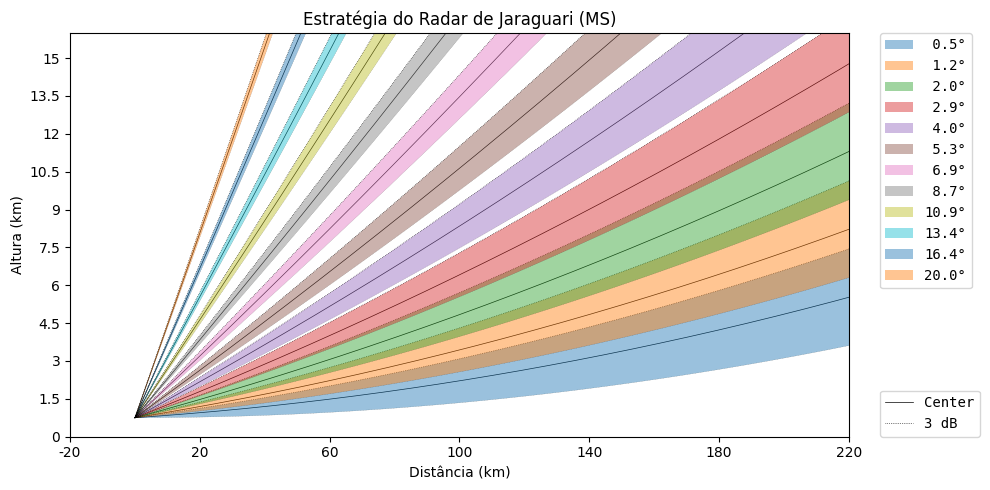

In [62]:
import numpy as np

#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = '2024032316300300dBZ.vol.h5'
radar = pyart.aux_io.read_odim_h5(f'/content/{filename}')

# extrai a latitude, longitude e altura do radar
lat_radar, lon_radar, alt_radar = radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0]

#========================================================================================================================#
#                                            INFORMA√á√ïES A SEREM UTILIZADAS
#========================================================================================================================#
# quantidade total de bins do feixe
ngates = radar.ngates

# resolu√ß√£o radial do feixe
radial_resolution = radar.range['meters_between_gates']

# √¢ngulos de eleva√ß√£o
sweeps = list(radar.fixed_angle['data'])

# dist√¢ncia de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution

# √¢ngulo de abertura do feixe
radar_beam_width = 0.996

# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = plt.subplots(figsize=(10,5))

# define estilo do gr√°fico
plt.style.use('default')

# plota figura
wrl.vis.plot_scan_strategy(ranges,
                           sweeps,
                           sitecoords,
                           beamwidth=radar_beam_width,
                           vert_res = 1000.,
                           maxalt = 15000.,
                           range_res = 10000.,
                           maxrange = 250000.,
                           units='km',
                           #vert_res = ,
                           #maxalt = ,
                           #range_res = ,
                           #maxrange = ,
                           #units= ,
                           ax=ax)


# configura√ß√£o do gr√°fico
ax.set_title('Estrat√©gia do Radar de Jaraguari (MS)')
ax.set_xlabel('Dist√¢ncia (km)')
ax.set_ylabel('Altura (km)')
ax.set_xticks(np.arange(-20000,221000,40000))
ax.set_yticks(np.arange(0,16000,1500))
ax.set_xlim(-20000,220000)
ax.set_ylim(0,16000)
ax.grid()

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig('Atividade_1_exercicio_a.png')

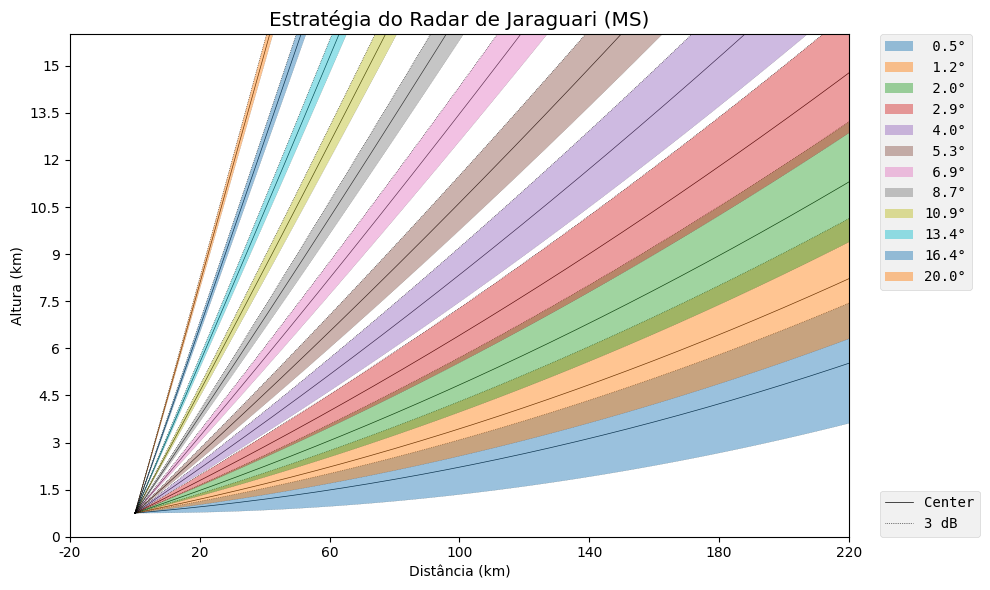